In [9]:
# try everything here
import sys
import networkx as nx # type: ignore
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel

sys.path.append('../')
from src.data.make_dataset import load_data

In [7]:
# Loading Data
data_dict = load_data()

olist_customers_df = data_dict['olist_customers_df']
olist_geolocation_df = data_dict['olist_geolocation_df']
olist_order_items_df = data_dict['olist_order_items_df']
olist_order_payments_df = data_dict['olist_order_payments_df']
olist_order_reviews_df = data_dict['olist_order_reviews_df']
olist_orders_df = data_dict['olist_orders_df']
olist_products_df = data_dict['olist_products_df']
olist_sellers_df = data_dict['olist_sellers_df']
product_category_name_translation_df = data_dict['product_category_name_translation_df']

olist_closed_deals_df = data_dict['olist_closed_deals_df']
olist_marketing_qualified_leads_df = data_dict['olist_marketing_qualified_leads_df']

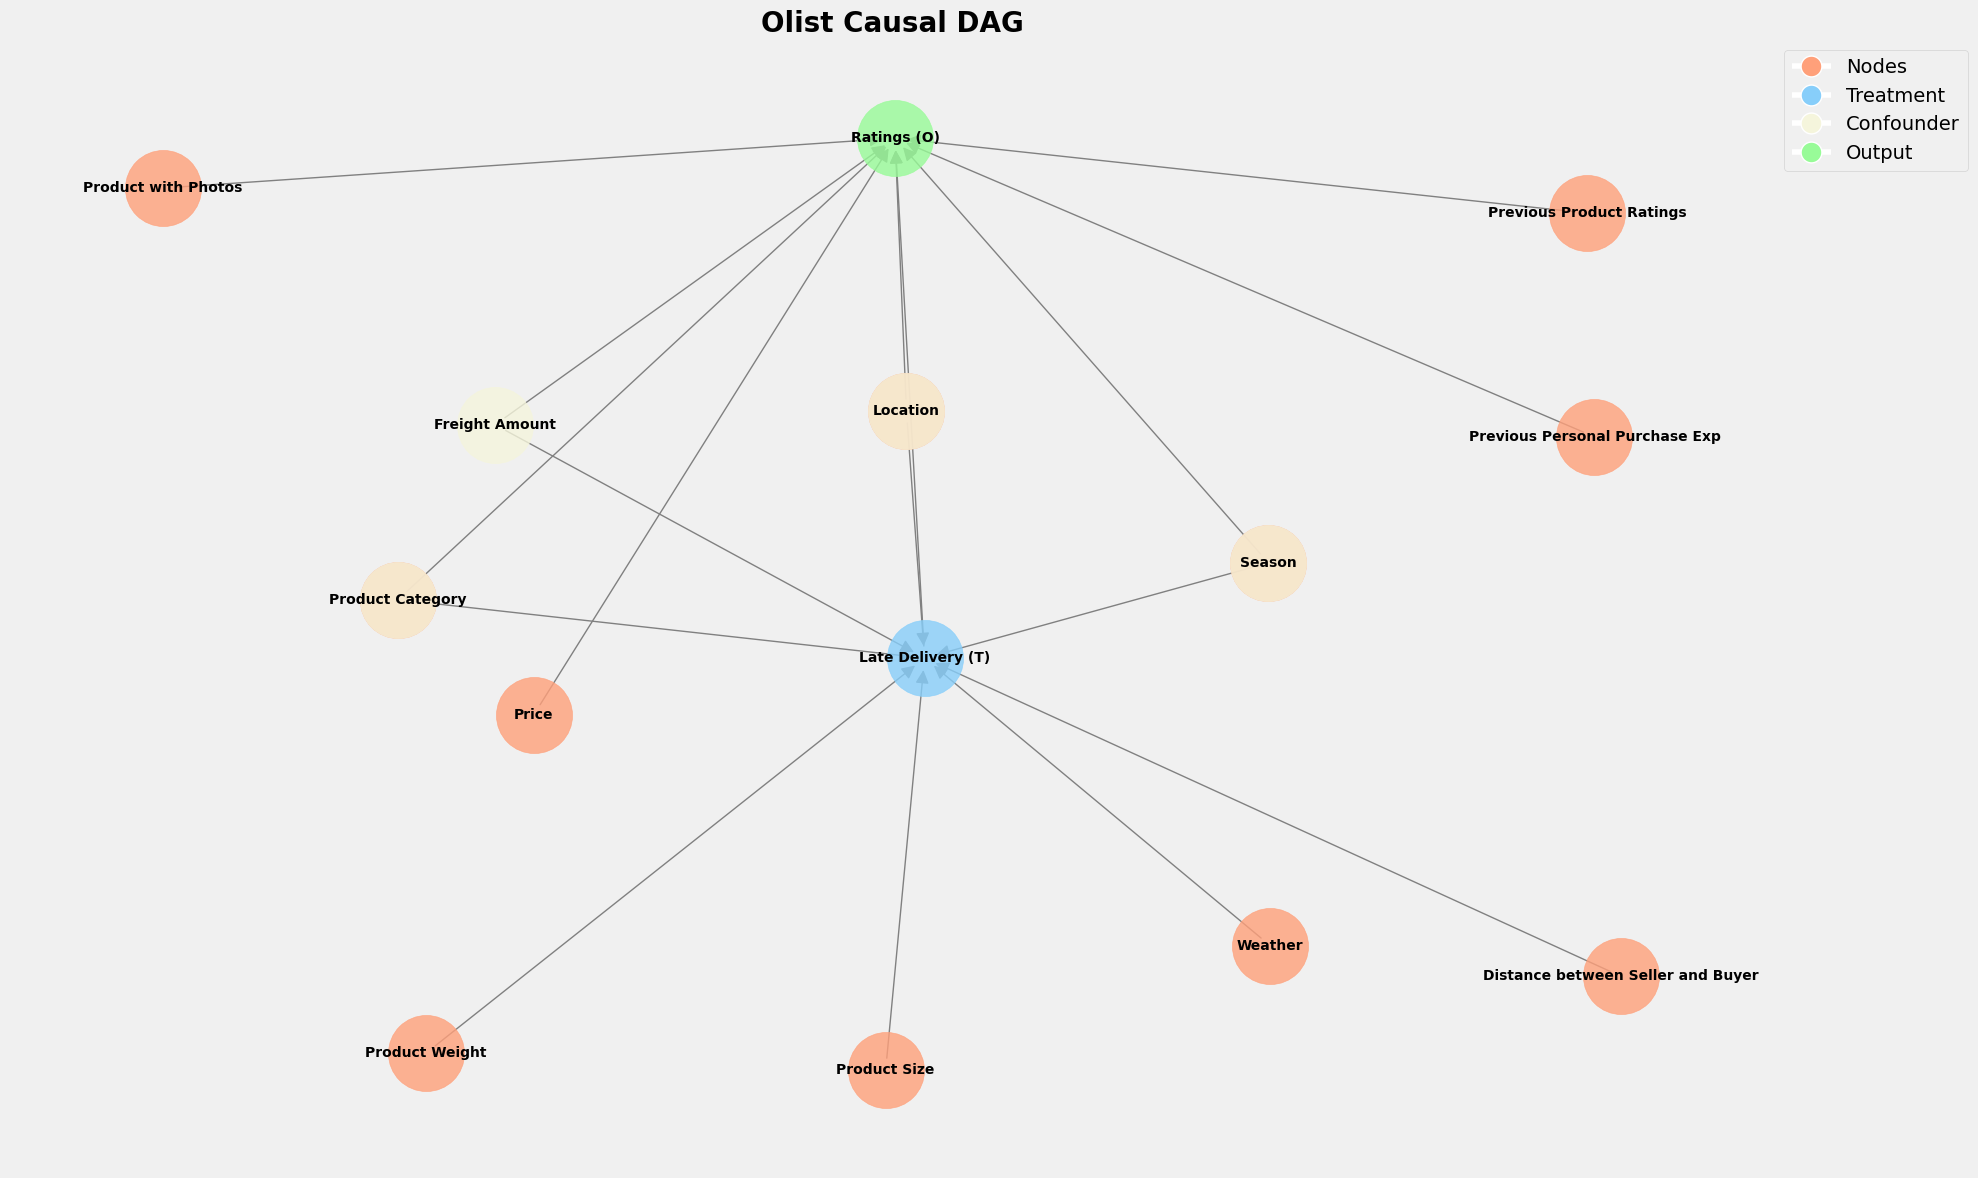

In [39]:
# Set the style
plt.style.use('fivethirtyeight')
sns.set_palette("pastel")

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
nodes = [
    "Product Weight",
    "Weather",
    "Distance between Seller and Buyer",
    "Product Size",
    "Late Delivery (T)",
    "Previous Product Ratings",
    "Product with Photos",
    "Ratings (O)",
    "Price",
    "Previous Personal Purchase Exp",
    "Location",
    "Product Category",
    "Season",
    "Freight Amount"
]
G.add_nodes_from(nodes)

# Add edges (relationships)
edges = [
    ("Weather", "Late Delivery (T)"),
    ("Product Weight", "Late Delivery (T)"),
    ("Distance between Seller and Buyer", "Late Delivery (T)"),
    ("Product Size", "Late Delivery (T)"),
    ("Late Delivery (T)", "Ratings (O)"),
    ("Previous Product Ratings", "Ratings (O)"),
    ("Product with Photos", "Ratings (O)"),
    ("Price", "Ratings (O)"),
    ("Previous Personal Purchase Exp", "Ratings (O)"),
    ("Location", "Late Delivery (T)"),
    ("Location", "Ratings (O)"),
    ("Product Category", "Late Delivery (T)"),
    ("Product Category", "Ratings (O)"),
    ("Season", "Late Delivery (T)"),
    ("Season", "Ratings (O)"),
    ("Freight Amount", "Late Delivery (T)"),
    ("Freight Amount", "Ratings (O)")
]
G.add_edges_from(edges)

# Set up the plot
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Color mapping
color_map = {
    "nodes": "#FFA07A",     # Light Salmon
    "treatment": "#87CEFA",  # Light Sky Blue
    "confounder": "#F5F5DC",
    "output": "#98FB98"     # Pale Green
}

# Categorize nodes
node_categories = {
    "nodes": ["Product Weight", "Weather", "Distance between Seller and Buyer", "Product Size", "Previous Product Ratings", 
              "Product with Photos", "Price", "Previous Personal Purchase Exp", 
              "Location", "Product Category", "Season"],
    'confounder': ['Location', 'Product Category', 'Season', 'Freight Amount'],
    "treatment": ["Late Delivery (T)"],
    "output": ["Ratings (O)"]
}

# Draw nodes
for category, node_list in node_categories.items():
    nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=color_map[category], 
                           node_size=3000, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Create a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat.capitalize(),
                              markerfacecolor=color, markersize=15)
                   for cat, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.title("Olist Causal DAG", fontsize=20, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()
